In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
#from scipy.stats import qmc
# from sklearn.preprocessing import MinMaxScaler

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
np.set_printoptions(threshold=1000000)
import keras as K
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Dropout, UpSampling2D, ZeroPadding2D, AveragePooling2D, Conv2DTranspose
from keras.layers import Flatten, Cropping1D, Reshape
from keras.layers.convolutional import Conv2D, Conv1D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D,MaxPooling1D
from keras.engine.topology import Layer
from keras.layers import Lambda, Input,LSTM,Input, concatenate
import tensorflow as tf
from itertools import product
from keras.layers import Conv1DTranspose
from keras.layers import Conv3DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Conv1DTranspose, Add
import tensorflow.keras.backend as K
import seaborn as sns
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Add, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from keras.layers import LeakyReLU
import math

2024-05-03 16:57:40.062625: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
# gpus = tf.config.list_physical_devices('GPU')
# print(gpus)

In [145]:
P1 = np.loadtxt('patt_batch1K.txt')
S1=np.loadtxt('S11_batch1K.txt')
I1 = np.loadtxt('imp_batch1K.txt')
Z1= I1[:,0:128]
np.shape(Z1)

(1016, 128)

In [228]:
np.shape(P1)

(1016, 41600)

In [6]:
# y1_te=np.reshape(P1,(1016,13,25,128))
# y1_te=np.swapaxes(y1_te,1,3)
# y1_te.shape

(1016, 128, 25, 13)

In [57]:
# pattern1=y1_te[10,125,:,:]
# np.min(pattern1)

-27.20757

In [4]:
# plt.figure(figsize = (6, 4),dpi=300)
# plt.imshow(pattern1,cmap = 'gist_rainbow_r')

# plt.show()

672


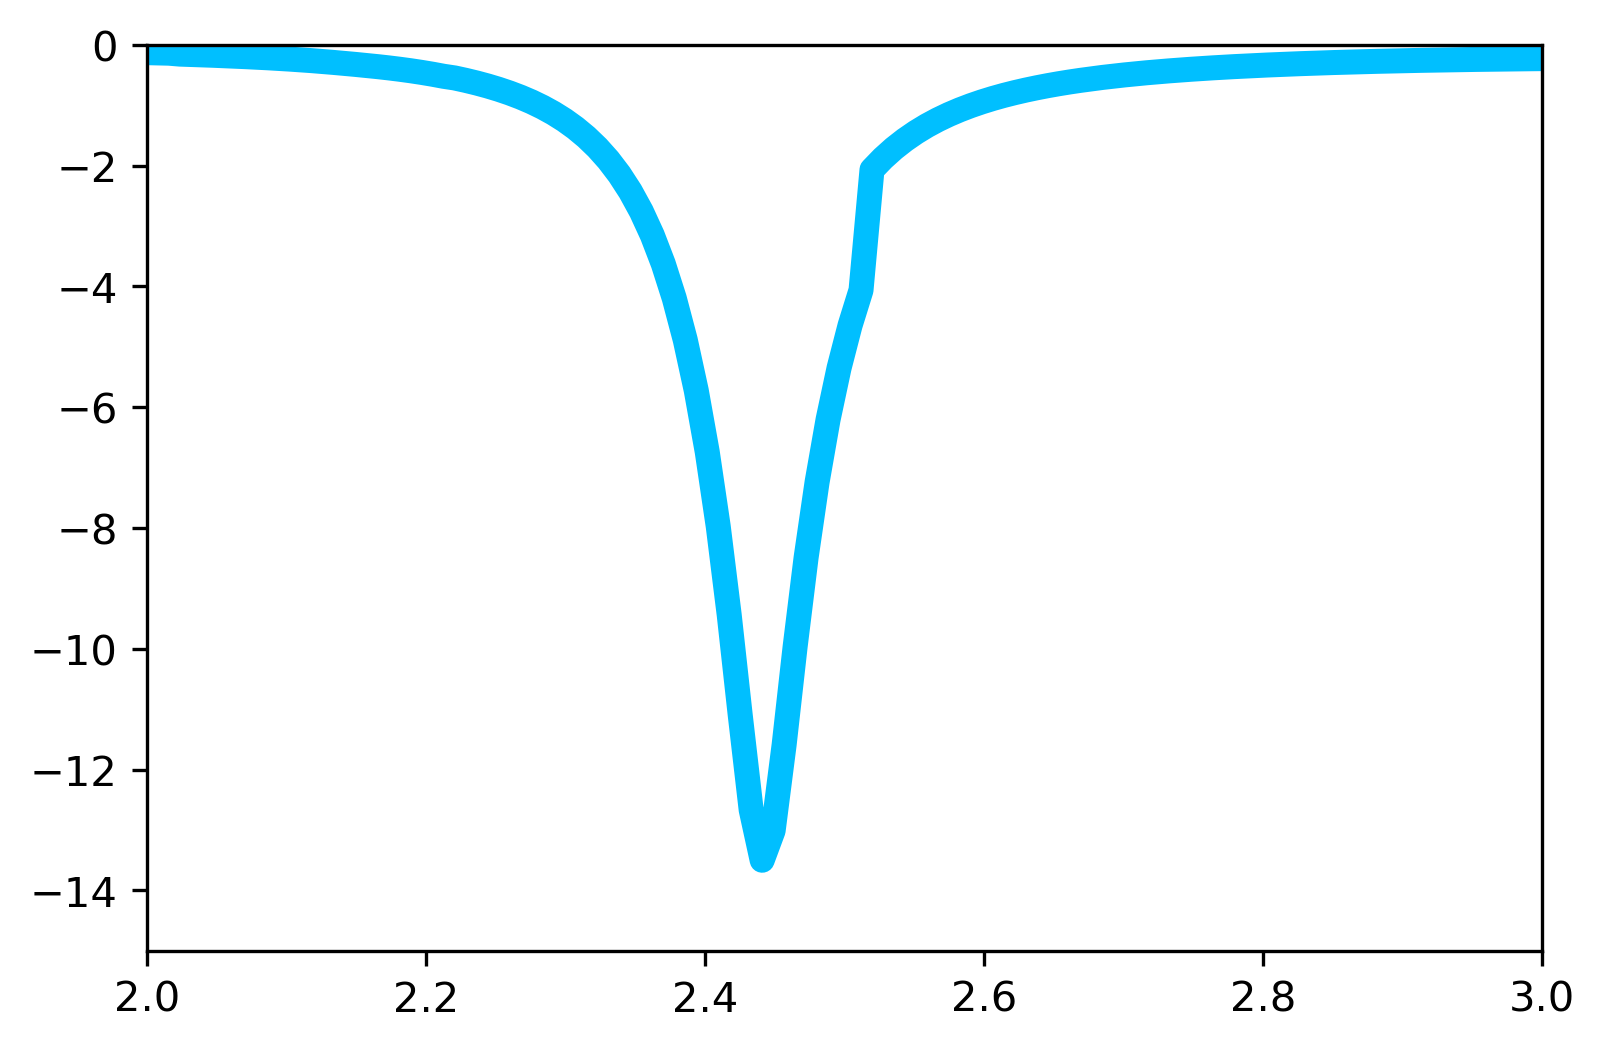

In [151]:
rr = np.random.randint(0,1016)
print(rr)
plt.figure(figsize = (6, 4),dpi=300)
freq = np.linspace(2,3,128)
plt.plot(freq,S1[70,:],linewidth=6,color = 'deepskyblue')
plt.xlim(2,3)
plt.ylim(-15,0)
# plt.scatter(freq,S1[70,:],marker='o',color='black',linewidths=2)
plt.show()

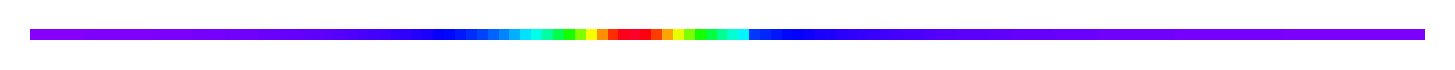

In [188]:
xx = Z1[70,:]
xx = np.reshape(xx, (1,128))
plt.figure(figsize = (6, 4),dpi=300)
plt.imshow(xx, cmap = 'gist_rainbow_r', vmin = -5)
plt.xticks([])
plt.yticks([])

ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

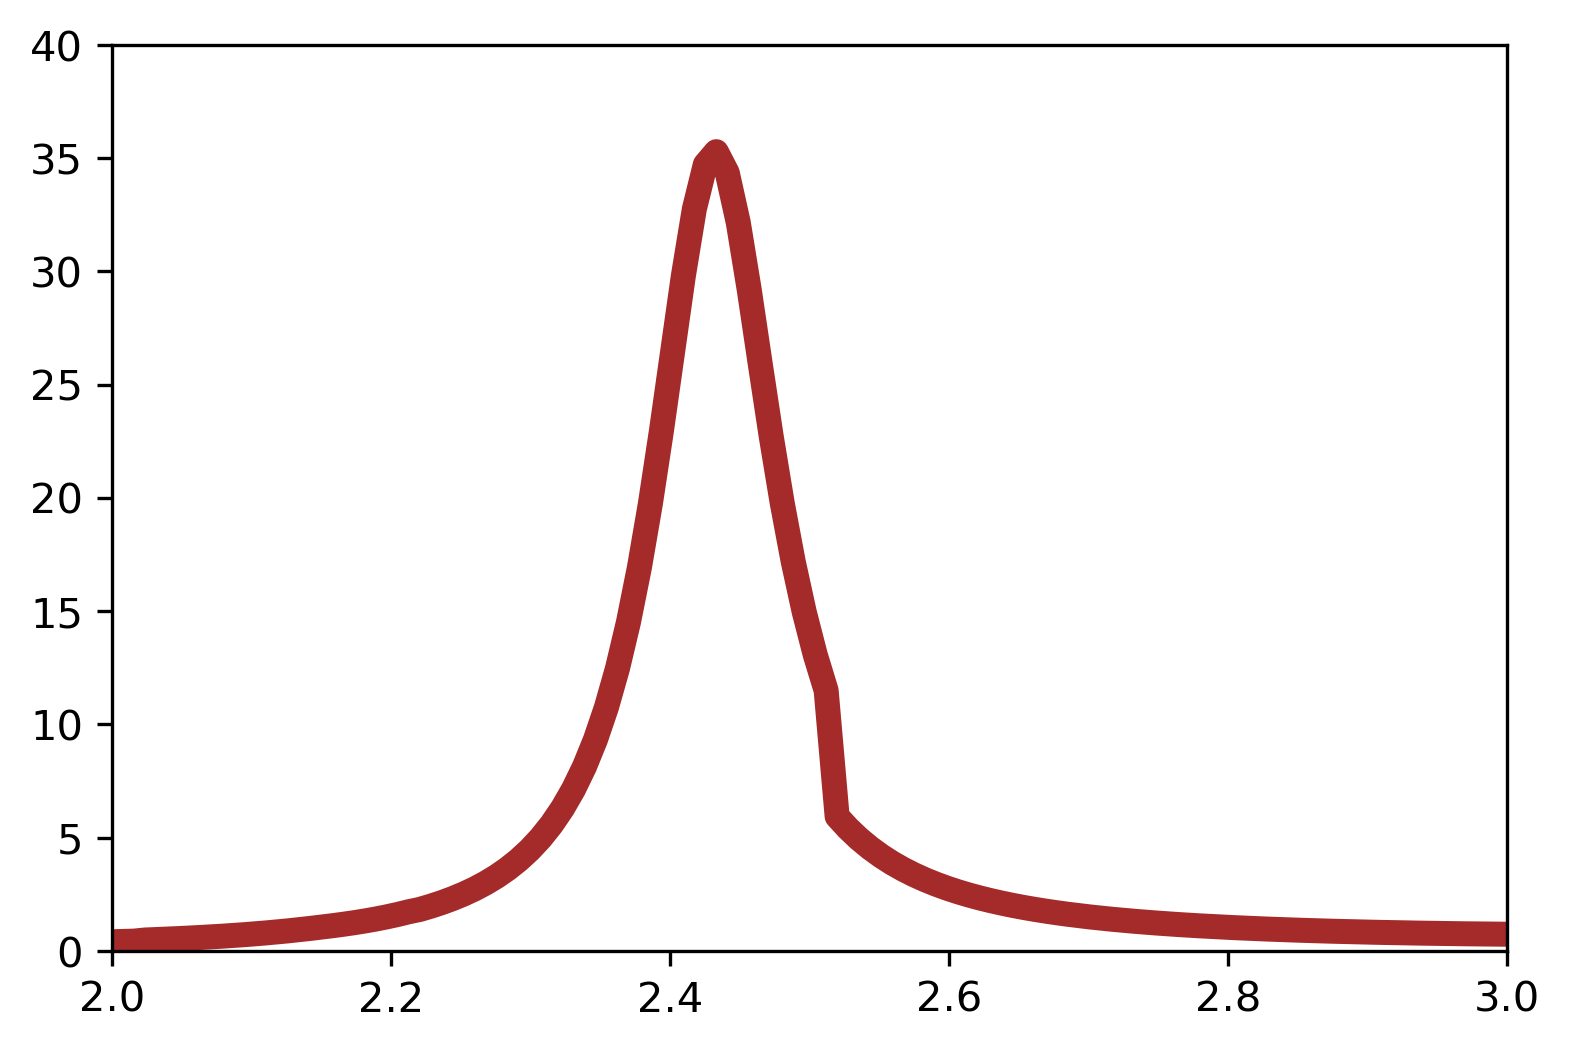

In [152]:
plt.figure(figsize = (6, 4),dpi=300)
plt.plot(freq,Z1[70,:],linewidth=6,color = 'brown')
plt.xlim(2,3)
plt.ylim(0,40)
# plt.scatter(freq,Z1[70,:],marker='o',color='black',linewidths=2)
plt.show()

In [5]:
P2 = np.loadtxt('patt_batch2-10K.txt')
S2=np.loadtxt('S11_batch2-10K.txt')
I2 = np.loadtxt('imp_batch2-10K.txt')
Z2= I2[:,0:128]
np.shape(Z2)

(9169, 128)

In [6]:
# P3 = np.loadtxt('patt_batch12K.txt')
# S3=np.loadtxt('S11_batch12K.txt')
# I3 = np.loadtxt('imp_batch12K.txt')
# Z3= I3[:,0:128]
# np.shape(Z2)

In [7]:
# P4 = np.loadtxt('patt_batch16K.txt')
# S4=np.loadtxt('S11_batch16K.txt')
# I4 = np.loadtxt('imp_batch16K.txt')
# Z4= I4[:,0:128]
# np.shape(Z2)

In [6]:
S11=np.concatenate((S1,S2),axis=0)
np.shape(S11)
Patt=np.concatenate((P1,P2),axis=0)
Zo=np.concatenate((Z1,Z2),axis=0)
np.shape(S11)

(10185, 128)

In [7]:
s11= S11/10
s11=10**s11
np.max(s11)

8.624978079870658

In [8]:
patt=Patt/10
patt=10**patt
np.max(patt)

563.4404211463883

In [96]:
# min_vals = tf.reduce_min(Zo, axis=1, keepdims=True)
# max_vals = tf.reduce_max(Zo, axis=1, keepdims=True)

# # Min-Max scaling
# normalized_data = (Zo - min_vals) / (max_vals - min_vals)

In [99]:
print(np.min(normalized_data))

0.0


In [9]:
yy=np.concatenate((patt,s11,Zo),axis=1)
np.shape(yy)

(10185, 41856)

In [165]:
# yy=np.concatenate((Patt,S11,Zo),axis=1)
# np.shape(yy)

(10185, 41856)

In [210]:
ys=yy[:,:]
ys.shape

(10185, 41856)

In [188]:
print(np.where(ys[:,41600:41728]>0))
# S11= np.delete(S11,[1379,1957,2468,2689,5090,7361],axis=0)
# np.shape(S11)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
# ys=np.delete(ys,[535,4183,5545,6460,6498],axis=0)
# ys.shape

(7080, 41856)

In [15]:
# yy=np.delete(yy,[499,572,874,1165,1308,2204,2754,3635,7283,8645,9560,9598],axis=0)
# np.shape(yy)

(10173, 41856)

In [98]:
# s11 =yy[:,41600:41728]
# S11=10*np.log(s11)
# print(np.where(S11>0))

In [6]:
# xx=np.loadtxt("str128_4K.txt")
# np.shape(xx)

(4096, 17)

In [7]:
# xx=np.delete(xx,[1379,1957,2468,2689],axis=0)
# np.shape(xx)

(4092, 17)

In [211]:
x1=np.loadtxt("X_batch1K.txt")
x1=x1[:,0:8]
np.shape(x1)
x2=np.loadtxt("X_batch2-10K.txt")
x2=x2[:,0:8]
# np.shape(x2)
# # x3=np.loadtxt("X_batch12K.txt")
# # x3=x3[:,0:8]
# # x4=np.loadtxt("X_batch16K.txt")
# # x4=x4[:,0:8]
XX=np.concatenate((x1,x2),axis=0)
np.shape(XX)

(10185, 8)

In [212]:
y1=np.loadtxt("Y_batch1K.txt")
y1=y1[:,0:8]
y2=np.loadtxt("Y_batch2-10K.txt")
y2=y2[:,0:8]
# np.shape(y1)
# # y3=np.loadtxt("Y_batch12K.txt")
# # y3=y3[:,0:8]
# # y4=np.loadtxt("Y_batch16K.txt")
# # y4=y4[:,0:8]
YY=np.concatenate((y1,y2),axis=0)
np.shape(YY)

(10185, 8)

In [213]:
xy=np.concatenate((XX,YY),axis=1)
np.shape(xy)

(10185, 16)

In [116]:
# xy=np.delete(xy,[499,572,874,1165,1308,2204,2754,3635,7283,8645,9560,9598],axis=0)
# np.shape(xy)

In [214]:
xs =xy[:10185,:]
xs.shape

(10185, 16)

In [17]:
# xs=np.delete(xs,[535,4183,5545,6460,6498],axis=0)
# xs.shape

(7080, 16)

4491


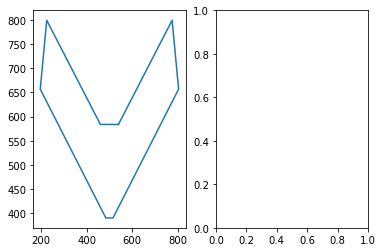

In [291]:

rr= np.random.randint(7080)
print(rr)
act=xs[rr]
x= np.append(act[0:8],act[0])
x=x*1000
y = np.append(act[8:16],act[8])
y=y*1000
freq = np.linspace(2,3,128)
# print(x,y)
fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.subplot(2,1,1)
ax1.plot(x,y)
# ax1.xlim(-30,30)
# ax1.ylim(-30,30)
# ax2.plot(freq,(s11[rr]))
plt.show()

In [179]:
# S11=yy[:,41600:41728]
# S11=10*np.log(S11)

# datapoint = []
# for i in range (S11.shape[0]):
#     if np.any(np.logical_and((S11[i,30:60]<-20),(S11[i,65:95]<-20))):
# #         plt.plot(P[i,:])
#         datapoint.append(i)
#         count = len(datapoint)
# # plt.show()
# print(datapoint,count)

[] 3


In [96]:
# datapoint = []
# for i in range (S11.shape[0]):
#     if np.any(np.logical_and(S11[20:60]<-20,S11[70:110]<-20)[i]):
#         datapoint.append(i)
#         count = len(datapoint)
# # plt.show()
# print(datapoint,count)

In [180]:
len(datapoint)

0

In [18]:
# xx2=np.delete(xy,[1379,1957,2468,2689,5090,7361],axis=0)
# np.shape(xx2)

In [17]:
# xx= np.zeros(np.shape(xy))
# xx = (xy-np.min(xy))/(np.max(xy)-np.min(xy))
# np.max(xx)

In [215]:
lower = np.array([-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,
                  -0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03])
                  

upper = np.array([0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,
                  0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03])
                  
for i in range (np.shape(xs)[0]):
    xs[i] = (xs[i]-lower)/(upper-lower)
np.max(xs)

0.9996666666666667

In [216]:
print(np.max(xs),np.min(xs),np.shape(xs))

0.9996666666666667 0.00033333333333331977 (10185, 16)


In [217]:
print(np.max(ys),np.min(ys),np.shape(ys))

1106.59154 -423.65202 (10185, 41856)


In [139]:
# yy3= np.zeros(np.shape(YY3))
# yy3 = (YY3-np.min(YY3))/(np.max(YY3)-np.min(YY3))
# np.max(yy3)

1.0

In [19]:
np.min(YY)
# yy.shape

-0.02988

In [24]:

# sns.scatterplot(data=S11)

# Custom Loss functions

In [999]:
class changeAlpha(keras.callbacks.Callback):
    def __init__(self, alpha):
        super(changeAlpha, self).__init__()
        self.alpha = alpha 

In [1238]:
def ant_loss(a,b,c,reg_fac,alpha):
    # function that accepts the ground truth and predictions
    def Ant_loss(y_true, y_pred):
        error1 = (y_true[:,0:5200] - y_pred[:,0:5200])
        error1 =  tf.square(error1) + reg_fac*tf.abs(error1)
        error2 = tf.square(y_true[:,5200:5216] - y_pred[:,5200:5216])
        error2 =  tf.square(error2) + reg_fac*tf.abs(error2)
        error2 = tf.exp(7*alpha)*error2
        error3 = tf.square(y_true[:,5216:5232] - y_pred[:,5216:5232])
        error3 =  tf.square(error3) + reg_fac*tf.abs(error3)
        error3 = tf.exp(.5*alpha)*error3

        loss1 = tf.reduce_mean(a*error1)
        loss2 = tf.reduce_mean(b*error2)
        loss3 = tf.reduce_mean(c*error3)
        total_loss = (loss1+loss2+loss3)/3
#         print(alpha)
        return total_loss
    # return the inner function tuned by the hyperparameter
    return Ant_loss

In [1001]:
def ant_loss2(a,b,c):
    # function that accepts the ground truth and predictions
    def Ant_loss2(y_true, y_pred):
        error1 = tf.square(y_true[:,0:5200] - y_pred[:,0:5200])
        error2 = tf.square(y_true[:,5200:5216] - y_pred[:,5200:5216])
        error3 = tf.square(y_true[:,5216:5232] - y_pred[:,5216:5232])
       

        loss1 = tf.reduce_mean(a*error1)
        loss2 = tf.reduce_mean(b*error2)
        loss3 = tf.reduce_mean(c*error3)
        total_loss = (loss1+loss2+loss3)/3
        print(alpha)
        return total_loss
    # return the inner function tuned by the hyperparameter
    return Ant_loss2

In [34]:
# Custom relative error
def rel_loss(y_true, y_pred):
#     error = tf.square((y_true - y_pred)/(y_pred))
    loss = tf.reduce_mean(tf.abs((y_true - y_pred)) / ((y_true)))
    return loss
   

In [21]:
def std_dev(actu, pred):
    return keras.backend.std(keras.backend.abs(actu - pred))

def mmae(actu, pred):
    return keras.backend.max(keras.backend.abs(actu - pred))

In [1155]:
def err_reg(reg_fac):
    # function that accepts the ground truth and predictions
    def S11_Reg(y_true, y_pred):
        error = y_true - y_pred
        return tf.square(error) + reg_fac*tf.abs(error)
    # return the inner function tuned by the hyperparameter
    return S11_Reg

# Train-Test split

In [218]:
x_tr,x_te,y_tr,y_te= train_test_split(xs, ys, test_size= 0.2)
print(np.shape(x_tr), np.shape(x_te), np.shape(y_tr), np.shape(y_te))

(8148, 16) (2037, 16) (8148, 41856) (2037, 41856)


# Combined learning model 1

In [4]:
initializer = tf.keras.initializers.GlorotNormal()
# with tf.device('/device:GPU:1'):
input_shape = (16,)

input_layer = Input(shape=input_shape)

dens1 = Dense(64,kernel_initializer=initializer,activation='relu')(input_layer)
#     dens1 = LeakyReLU(alpha=0.1)(dens1)
dens2 = Dense(128,kernel_initializer=initializer,activation='relu')(dens1)
#     dens2 = LeakyReLU(alpha=0.1)(dens2)
dens3 = Dense(256,kernel_initializer=initializer,activation='relu')(dens2)
#     dens3 = LeakyReLU(alpha=0.1)(dens3)
dens4 = Dense(512,kernel_initializer=initializer,activation='relu')(dens3) 
#     dens4 = LeakyReLU(alpha=0.1)(dens4)
d1 = Dropout(0.5)(dens4)
   
     # S11 training
dens9 = Dense(512,kernel_initializer=initializer,activation='relu')(d1)
dens10 = Dense(128,kernel_initializer=initializer,activation='relu')(dens9)
#     dens11 = Dense(128,kernel_initializer=initializer,activation='relu')(dens10)
#     dens12 = Dense(32,kernel_initializer=initializer,activation='relu')(dens11)
S11 = Dense(128,kernel_initializer=initializer,activation='relu')(dens10)


# Zo training
dens13 = Dense(512,kernel_initializer=initializer,activation='relu')(d1)
dens14 = Dense(128,kernel_initializer=initializer,activation='relu')(dens13)
#     dens15 = Dense(64,kernel_initializer=initializer,activation='relu')(dens14)
#     dens16 = Dense(32,kernel_initializer=initializer,activation='relu')(dens15)
Zo = Dense(128,kernel_initializer=initializer,activation='relu')(dens14)
    
# merging
x_1 = concatenate([S11, Zo])
dens17 = Dense(256,kernel_initializer=initializer,activation='relu')(x_1)

     
    # pattern training   
densf = Dense(3200,activation='relu')(d1)
reshaped = Reshape((128, 25, 1))(densf)
    
    
conv2d_transpose = Conv2DTranspose(128, (1, 1), activation='relu',kernel_initializer=initializer)(reshaped)
# conv2d_transpose1 = Conv2DTranspose(64, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose)
# conv2d_transpose2 = Conv2DTranspose(128, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose1)
conv2d_transpose3 = Conv2DTranspose(13, (1, 1), activation='relu',kernel_initializer=initializer)(conv2d_transpose)
Pattern_output = Reshape((41600,))(conv2d_transpose3)

x_2 = concatenate([Pattern_output, dens17])
# dens14 = Dense(2048,activation='relu',kernel_initializer=initializer)(dens17)
# dens15 = Dense(4096,activation='relu',kernel_initializer=initializer)(dens14)
# densf = Dense(41856, activation='linear')(x_2)

         
model = Model(inputs=input_layer, outputs=x_2)
    # Compile the combined model
#     alpha = K.variable(1.)
model.compile(optimizer='adam',
                           loss=['mse'],
                           metrics=['mse'])

    # Print the model summary
model.summary()
     

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 64)           1088        input_2[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 128)          8320        dense_12[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 256)          33024       dense_13[0][0]                   
____________________________________________________________________________________________

# Combined learning model 2

In [88]:
initializer = tf.keras.initializers.GlorotNormal()
from tensorflow.keras.regularizers import l1, l2,L1L2
# l1_regularization = 0.3
# l2_regularization = 0.1 ,,kernel_regularizer=l1_l2(lamda)
lamda =0
L2 = 0
# activity_regularizer=l2(l2_regularization)
with tf.device('/device:GPU:0'):
    iput = Input(shape=(16,1))

    conv1 = Conv1D(filters=32, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(iput)
        #    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2)
        #     conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)
        #     conv3 = MaxPooling1D(pool_size=2)(conv3)
    conv4 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
        #     conv4 = Dropout(0.3)(conv4)
        #     conv4 = MaxPooling1D(pool_size=2)(conv4)
    conv5 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv4)
    conv5 = BatchNormalization()(conv5)
        #     conv5 = Dropout(0.3)(conv5)
        #     conv5 = MaxPooling1D(pool_size=2)(conv5)
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv5)
    conv6 = BatchNormalization()(conv6)
        #     conv6 = MaxPooling1D(pool_size=2)(conv6)
    conv7 = Conv1D(filters=1024, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv6)
    conv7 = BatchNormalization()(conv7)
#             conv7= MaxPooling1D(pool_size=2)(conv7)
    conv8 = Conv1D(filters=1024, kernel_size=2, activation='relu',kernel_regularizer=L1L2(lamda))(conv7)
    conv8 = BatchNormalization()(conv8)
#     conv8 = Dropout(0.5)(conv8)
#         conv8= MaxPooling1D(pool_size=2)(conv8)
#     conv9 = Conv1D(filters=2048, kernel_size=1, activation='relu',kernel_regularizer=L1L2(lamda))(conv8)
#     conv9 = BatchNormalization()(conv9)
    #     conv9 = Dropout(0.5)(conv9)

    F = Flatten()(conv8)

    #     dens1 = Dense(20928, activation='relu',kernel_initializer=initializer,kernel_regularizer=L1L2(lamda))(F)
        #     dens1= BatchNormalization()(dens1)
    densf = Dense(41856, activation='linear')(F)
    oput=densf


    model3 = Model(inputs=iput, outputs = oput)


    model3.summary()
        #     opt = SGD(learning_rate=0.001, momentum=0.99)
    model3.compile(optimizer = 'adam',
                        loss=['mse'],
                        metrics=['mse'])      


Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 16, 1)]           0         
_________________________________________________________________
conv1d_226 (Conv1D)          (None, 14, 32)            128       
_________________________________________________________________
batch_normalization_226 (Bat (None, 14, 32)            128       
_________________________________________________________________
conv1d_227 (Conv1D)          (None, 12, 128)           12416     
_________________________________________________________________
batch_normalization_227 (Bat (None, 12, 128)           512       
_________________________________________________________________
conv1d_228 (Conv1D)          (None, 10, 256)           98560     
_________________________________________________________________
batch_normalization_228 (Bat (None, 10, 256)           102

In [189]:
initializer = tf.keras.initializers.GlorotNormal()
from tensorflow.keras.regularizers import l1, l2,L1L2
# l1_regularization = 0.3
# l2_regularization = 0.1 ,,kernel_regularizer=l1_l2(lamda)
lamda =0
L2 = 0
# activity_regularizer=l2(l2_regularization)
with tf.device('/device:GPU:0'):
    iput = Input(shape=(16,1))

    conv1 = Conv1D(filters=32, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(iput)
        #    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2)
        #     conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)
        #     conv3 = MaxPooling1D(pool_size=2)(conv3)
    conv4 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
        #     conv4 = Dropout(0.3)(conv4)
        #     conv4 = MaxPooling1D(pool_size=2)(conv4)
    conv5 = Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv4)
    conv5 = BatchNormalization()(conv5)
        #     conv5 = Dropout(0.3)(conv5)
        #     conv5 = MaxPooling1D(pool_size=2)(conv5)
    conv6 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv5)
    conv6 = BatchNormalization()(conv6)
        #     conv6 = MaxPooling1D(pool_size=2)(conv6)
    conv7 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv6)
    conv7 = BatchNormalization()(conv7)
#             conv7= MaxPooling1D(pool_size=2)(conv7)
    conv8 = Conv1D(filters=128, kernel_size=2, activation='relu',kernel_regularizer=L1L2(lamda))(conv7)
    conv8 = BatchNormalization()(conv8)
#     conv8 = Dropout(0.5)(conv8)
#         conv8= MaxPooling1D(pool_size=2)(conv8)
#     conv9 = Conv1D(filters=2048, kernel_size=1, activation='relu',kernel_regularizer=L1L2(lamda))(conv8)
#     conv9 = BatchNormalization()(conv9)
    #     conv9 = Dropout(0.5)(conv9)

    F = Flatten()(conv8)

    #     dens1 = Dense(20928, activation='relu',kernel_initializer=initializer,kernel_regularizer=L1L2(lamda))(F)
        #     dens1= BatchNormalization()(dens1)
    densf = Dense(41856, activation='linear')(F)
    oput=densf


    model3 = Model(inputs=iput, outputs = oput)


    model3.summary()
        #     opt = SGD(learning_rate=0.001, momentum=0.99)
    model3.compile(optimizer = 'adam',
                        loss=['mse'],
                        metrics=['mse'])    

Model: "model_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        [(None, 16, 1)]           0         
_________________________________________________________________
conv1d_714 (Conv1D)          (None, 14, 32)            128       
_________________________________________________________________
batch_normalization_714 (Bat (None, 14, 32)            128       
_________________________________________________________________
conv1d_715 (Conv1D)          (None, 12, 64)            6208      
_________________________________________________________________
batch_normalization_715 (Bat (None, 12, 64)            256       
_________________________________________________________________
conv1d_716 (Conv1D)          (None, 10, 64)            12352     
_________________________________________________________________
batch_normalization_716 (Bat (None, 10, 64)            256

# Combined Leaning model 3

In [227]:
initializer = tf.keras.initializers.GlorotNormal()
from tensorflow.keras.regularizers import L1L2

lamda = 0
L2 = 0

# Input layer
input_layer = Input(shape=(16, 1))

# Convolutional layers
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=L1L2(lamda))(input_layer)
conv1 = BatchNormalization()(conv1)

conv2 = Conv1D(filters=64, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv1)
conv2 = BatchNormalization()(conv2)

conv3 = Conv1D(filters=128, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv2)
conv3 = BatchNormalization()(conv3)

conv4 = Conv1D(filters=256, kernel_size=4, activation='relu', kernel_regularizer=L1L2(lamda))(conv3)
conv4 = BatchNormalization()(conv4)
# print(conv4.shape)
# S11 training 
densS11 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
densS12 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densS11)
densS13 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densS12)
densS11 = Flatten()(densS13)
# Zo training
densZo = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
densZ1 = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densZo)
densZ2 = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densZ1)

# densZo = LeakyReLU()(densZo)
densZo = Flatten()(densZ2)


# Pattern training
densPattern = Dense(41600,activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
densPattern = Reshape((13, 25,128))(densPattern)
# densPattern = LeakyReLU()(densPattern)
# print(densPattern)
conv2d_transpose = Conv2DTranspose(128, (1,1),activation='relu', kernel_initializer=initializer)(densPattern)
# conv2d_transpose = LeakyReLU()(conv2d_transpose)
# reshaped = Reshape((20, 20,1))(densPattern)


conv2d_transpose1 = Conv2DTranspose(128, (1, 1), activation='relu', kernel_initializer=initializer)(conv2d_transpose)
# conv2d_transpose1 = Conv2DTranspose(13, (1, 1), activation='relu', kernel_initializer=initializer)(conv2d_transpose)
# Pattern_output = Reshape((41600,))(conv2d_transpose1)
conv2d_transpose = Flatten()(conv2d_transpose1)


# Final merging and output
final_merged = concatenate([conv2d_transpose, densS11, densZo])
# output_layer = Dense(41856, activation='linear')(final_merged)

# Create model
modelA = Model(inputs=input_layer, outputs=final_merged)

# Compile model
modelA.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Summary of the model
modelA.summary()


Model: "model_152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_154 (InputLayer)          [(None, 16, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_1198 (Conv1D)            (None, 14, 32)       128         input_154[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1198 (Batch (None, 14, 32)       128         conv1d_1198[0][0]                
__________________________________________________________________________________________________
conv1d_1199 (Conv1D)            (None, 9, 64)        12352       batch_normalization_1198[0][0]   
__________________________________________________________________________________________

In [202]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dense, Flatten, Reshape, Conv2DTranspose, LSTM, concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.initializers import GlorotNormal
# from tensorflow.keras.regularizers import L1L2

# # Initializers and Regularizers
# initializer = GlorotNormal()
# lamda = 0
# L2 = 0

# # Input layer
# input_layer = Input(shape=(16, 1))

# # Convolutional layers
# conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=L1L2(lamda))(input_layer)
# conv1 = BatchNormalization()(conv1)

# conv2 = Conv1D(filters=64, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv1)
# conv2 = BatchNormalization()(conv2)

# conv3 = Conv1D(filters=128, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv2)
# conv3 = BatchNormalization()(conv3)

# conv4 = Conv1D(filters=256, kernel_size=4, activation='relu', kernel_regularizer=L1L2(lamda))(conv3)
# conv4 = BatchNormalization()(conv4)

# # S11 training with LSTM
# densS11 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
# lstmS11 = LSTM(128, return_sequences=True)(Reshape((128, 1))(densS11))

# # Zo training with LSTM
# densZo = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
# lstmZo = LSTM(128, return_sequences=True)(Reshape((128, 1))(densZo))

# # Pattern training
# densPattern = Dense(41600, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
# densPattern = Reshape((13, 25, 128))(densPattern)
# conv2d_transpose = Conv2DTranspose(128, (1, 1), activation='relu', kernel_initializer=initializer)(densPattern)
# conv2d_transpose = Flatten()(conv2d_transpose)

# # Final merging and output
# final_merged = concatenate([conv2d_transpose, lstmS11, lstmZo])

# # Create model
# modelA = Model(inputs=input_layer, outputs=final_merged)

# # Compile model
# modelA.compile(optimizer='adam', loss='mse', metrics=['mse'])

# # Summary of the model
# modelA.summary()


In [89]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=100)
# Ms = tf.keras.callbacks.ModelCheckpoint(filepath='best_model3.h5', monitor='val_mse', save_best_only=True)
#instance = changeAlpha()
with tf.device('/device:GPU:0'):
    hstry3 = model3.fit(x_tr,y_tr, epochs = 10000,
                    batch_size=1024, shuffle=True,
                validation_data=(x_te,y_te), callbacks=[es])

Epoch 1/10000
8/8 [==============================] - 35s 3s/step - loss: 0.8192 - mse: 0.8192 - val_loss: 0.7749 - val_mse: 0.7749
Epoch 2/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.7355 - mse: 0.7355 - val_loss: 0.7758 - val_mse: 0.7758
Epoch 3/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.6471 - mse: 0.6471 - val_loss: 0.7563 - val_mse: 0.7563
Epoch 4/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.6160 - mse: 0.6160 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 5/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.5436 - mse: 0.5436 - val_loss: 0.7006 - val_mse: 0.7006
Epoch 6/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.4893 - mse: 0.4893 - val_loss: 0.6843 - val_mse: 0.6843
Epoch 7/10000
8/8 [==============================] - 1s 187ms/step - loss: 0.5643 - mse: 0.5643 - val_loss: 0.6488 - val_mse: 0.6488
Epoch 8/10000
8/8 [==============================] - 1s 171ms/step - lo

8/8 [==============================] - 1s 174ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.3209 - val_mse: 0.3209
Epoch 124/10000
8/8 [==============================] - 1s 172ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.3298 - val_mse: 0.3298
Epoch 125/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.3269 - val_mse: 0.3269
Epoch 126/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.3192 - val_mse: 0.3192
Epoch 127/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.3330 - val_mse: 0.3330
Epoch 128/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.0399 - mse: 0.0399 - val_loss: 0.3646 - val_mse: 0.3646
Epoch 129/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.5827 - val_mse: 0.5827
Epoch 130/10000
8/8 [==============================] - 1s 180ms/step - 

Epoch 184/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.3565 - val_mse: 0.3565
Epoch 185/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.3768 - val_mse: 0.3768
Epoch 186/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.3780 - val_mse: 0.3780
Epoch 187/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.4002 - val_mse: 0.4002
Epoch 188/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.3780 - val_mse: 0.3780
Epoch 189/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.3994 - val_mse: 0.3994
Epoch 190/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.3905 - val_mse: 0.3905
Epoch 191/10000
8/8 [==============================] - 

In [619]:
# modelb = load_model('model_for_pattern.h5')

In [90]:
with tf.device('/device:GPU:0'):
    y_pred = model3.predict(x_te)
    err = np.mean((y_te - y_pred)**2)
    print(err)

0.36248636200728374


# Model  running in loop with 10 iterations

In [202]:
# Function to create and compile the model
def create_model():
    initializer = tf.keras.initializers.GlorotNormal()
    lamda = 0
    iput = Input(shape=(16,1))
    conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=L1L2(lamda))(iput)
    
    conv1 = BatchNormalization()(conv1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2) 
    conv3 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)       
    conv4 = Conv1D(filters=512, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
      
    conv5 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv4)
    conv5 = BatchNormalization()(conv5)
      
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv5)
    conv6 = BatchNormalization()(conv6)
      
    conv7 = Conv1D(filters=1024, kernel_size=3, activation='relu',kernel_regularizer=L1L2(lamda))(conv6)
    conv7 = BatchNormalization()(conv7)
           
    conv8 = Conv1D(filters=1024, kernel_size=2, activation='relu',kernel_regularizer=L1L2(lamda))(conv7)
    conv8 = BatchNormalization()(conv8)
  
    F = Flatten()(conv8)

    
    densf = Dense(41856, activation='linear')(F)
    

    # Compile the model
    model = Model(inputs=iput, outputs=densf)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Data preparation and splitting
# Replace x_tr, y_tr, x_te, y_te with your training and testing data

# Initialize list to store errors
errors = []

# Loop for 10 iterations
for i in range(10):
    # Create and compile the model
    model = create_model()

    # Train the model
    es = EarlyStopping(monitor='val_mse', mode='min', patience=50)
    hstry = model.fit(x_tr, y_tr, epochs=10000, batch_size=1024, shuffle=True,
                      validation_data=(x_te, y_te), callbacks=[es])

    # Predict on test data
    y_pred = model.predict(x_te)
    # Calculate prediction error
    err = np.mean((y_te - y_pred)**2)
    # Append error to list
    errors.append(err)

# Save errors to a single file
np.savetxt('prediction_errors3k.txt', errors)

Epoch 1/10000
3/3 [==============================] - ETA: 0s - loss: 0.8615 - mse: 0.8615

2024-05-05 23:13:08.510243: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


3/3 [==============================] - 113s 55s/step - loss: 0.8534 - mse: 0.8534 - val_loss: 0.5884 - val_mse: 0.5884
Epoch 2/10000
3/3 [==============================] - 1s 191ms/step - loss: 0.7320 - mse: 0.7320 - val_loss: 0.5822 - val_mse: 0.5822
Epoch 3/10000
3/3 [==============================] - 1s 178ms/step - loss: 0.6709 - mse: 0.6709 - val_loss: 0.5783 - val_mse: 0.5783
Epoch 4/10000
3/3 [==============================] - 1s 179ms/step - loss: 0.6932 - mse: 0.6932 - val_loss: 0.5727 - val_mse: 0.5727
Epoch 5/10000
3/3 [==============================] - 1s 181ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.5723 - val_mse: 0.5723
Epoch 6/10000
3/3 [==============================] - 1s 182ms/step - loss: 0.5846 - mse: 0.5846 - val_loss: 0.5628 - val_mse: 0.5628
Epoch 7/10000
3/3 [==============================] - 1s 186ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.5617 - val_mse: 0.5617
Epoch 8/10000
3/3 [==============================] - 1s 177ms/step - loss: 0.5776 -

3/3 [==============================] - 1s 191ms/step - loss: 0.3302 - mse: 0.3302 - val_loss: 0.4428 - val_mse: 0.4428
Epoch 25/10000
3/3 [==============================] - 1s 206ms/step - loss: 0.3683 - mse: 0.3683 - val_loss: 0.4400 - val_mse: 0.4400
Epoch 26/10000
3/3 [==============================] - 1s 178ms/step - loss: 0.3343 - mse: 0.3343 - val_loss: 0.4570 - val_mse: 0.4570
Epoch 27/10000
3/3 [==============================] - 1s 196ms/step - loss: 0.3355 - mse: 0.3355 - val_loss: 0.4528 - val_mse: 0.4528
Epoch 28/10000
3/3 [==============================] - 1s 178ms/step - loss: 0.3035 - mse: 0.3035 - val_loss: 0.4555 - val_mse: 0.4555
Epoch 29/10000
3/3 [==============================] - 1s 192ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.4544 - val_mse: 0.4544
Epoch 30/10000
3/3 [==============================] - 1s 179ms/step - loss: 0.2456 - mse: 0.2456 - val_loss: 0.4604 - val_mse: 0.4604
Epoch 31/10000
3/3 [==============================] - 1s 183ms/step - loss: 0

3/3 [==============================] - 1s 178ms/step - loss: 0.1283 - mse: 0.1283 - val_loss: 0.4452 - val_mse: 0.4452
Epoch 62/10000
3/3 [==============================] - 1s 186ms/step - loss: 0.1232 - mse: 0.1232 - val_loss: 0.4696 - val_mse: 0.4696
Epoch 63/10000
3/3 [==============================] - 1s 170ms/step - loss: 0.1148 - mse: 0.1148 - val_loss: 0.5309 - val_mse: 0.5309
Epoch 64/10000
3/3 [==============================] - 1s 187ms/step - loss: 0.1102 - mse: 0.1102 - val_loss: 0.4844 - val_mse: 0.4844
Epoch 65/10000
3/3 [==============================] - 1s 190ms/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.4931 - val_mse: 0.4931
Epoch 66/10000
3/3 [==============================] - 1s 181ms/step - loss: 0.1122 - mse: 0.1122 - val_loss: 0.5072 - val_mse: 0.5072
Epoch 67/10000
3/3 [==============================] - 1s 176ms/step - loss: 0.1198 - mse: 0.1198 - val_loss: 0.4882 - val_mse: 0.4882
Epoch 68/10000
3/3 [==============================] - 1s 189ms/step - loss: 0

3/3 [==============================] - 1s 194ms/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.4476 - val_mse: 0.4476
Epoch 79/10000
3/3 [==============================] - 1s 185ms/step - loss: 0.0856 - mse: 0.0856 - val_loss: 0.4609 - val_mse: 0.4609
Epoch 80/10000
3/3 [==============================] - 1s 185ms/step - loss: 0.0841 - mse: 0.0841 - val_loss: 0.4472 - val_mse: 0.4472
Epoch 81/10000
3/3 [==============================] - 1s 182ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.4754 - val_mse: 0.4754
Epoch 82/10000
3/3 [==============================] - 1s 171ms/step - loss: 0.0850 - mse: 0.0850 - val_loss: 0.4693 - val_mse: 0.4693
Epoch 83/10000
3/3 [==============================] - 1s 185ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.4548 - val_mse: 0.4548
Epoch 84/10000
3/3 [==============================] - 1s 183ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.4884 - val_mse: 0.4884
Epoch 85/10000
3/3 [==============================] - 1s 182ms/step - loss: 0

3/3 [==============================] - 1s 176ms/step - loss: 0.6343 - mse: 0.6343 - val_loss: 0.5649 - val_mse: 0.5649
Epoch 8/10000
3/3 [==============================] - 1s 183ms/step - loss: 0.6365 - mse: 0.6365 - val_loss: 0.5558 - val_mse: 0.5558
Epoch 9/10000
3/3 [==============================] - 1s 189ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.5465 - val_mse: 0.5465
Epoch 10/10000
3/3 [==============================] - 1s 191ms/step - loss: 0.5070 - mse: 0.5070 - val_loss: 0.5468 - val_mse: 0.5468
Epoch 11/10000
3/3 [==============================] - 1s 182ms/step - loss: 0.5074 - mse: 0.5074 - val_loss: 0.5209 - val_mse: 0.5209
Epoch 12/10000
3/3 [==============================] - 1s 190ms/step - loss: 0.5004 - mse: 0.5004 - val_loss: 0.4869 - val_mse: 0.4869
Epoch 13/10000
3/3 [==============================] - 1s 197ms/step - loss: 0.5523 - mse: 0.5523 - val_loss: 0.5085 - val_mse: 0.5085
Epoch 14/10000
3/3 [==============================] - 1s 177ms/step - loss: 0.5

3/3 [==============================] - 1s 189ms/step - loss: 0.2797 - mse: 0.2797 - val_loss: 0.4192 - val_mse: 0.4192
Epoch 35/10000
3/3 [==============================] - 1s 174ms/step - loss: 0.2514 - mse: 0.2514 - val_loss: 0.4259 - val_mse: 0.4259
Epoch 36/10000
3/3 [==============================] - 1s 197ms/step - loss: 0.2185 - mse: 0.2185 - val_loss: 0.4253 - val_mse: 0.4253
Epoch 37/10000
3/3 [==============================] - 1s 188ms/step - loss: 0.2389 - mse: 0.2389 - val_loss: 0.4226 - val_mse: 0.4226
Epoch 38/10000
3/3 [==============================] - 1s 188ms/step - loss: 0.2113 - mse: 0.2113 - val_loss: 0.4231 - val_mse: 0.4231
Epoch 39/10000
3/3 [==============================] - 1s 181ms/step - loss: 0.2095 - mse: 0.2095 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 40/10000
3/3 [==============================] - 1s 175ms/step - loss: 0.2099 - mse: 0.2099 - val_loss: 0.4232 - val_mse: 0.4232
Epoch 41/10000
3/3 [==============================] - 1s 171ms/step - loss: 0

3/3 [==============================] - 1s 179ms/step - loss: 0.1796 - mse: 0.1796 - val_loss: 0.9006 - val_mse: 0.9006
Epoch 64/10000
3/3 [==============================] - 1s 177ms/step - loss: 0.1823 - mse: 0.1823 - val_loss: 0.7371 - val_mse: 0.7371
Epoch 65/10000
3/3 [==============================] - 1s 182ms/step - loss: 0.1853 - mse: 0.1853 - val_loss: 0.5958 - val_mse: 0.5958
Epoch 66/10000
3/3 [==============================] - 1s 185ms/step - loss: 0.1790 - mse: 0.1790 - val_loss: 0.5582 - val_mse: 0.5582
Epoch 67/10000
3/3 [==============================] - 1s 181ms/step - loss: 0.1802 - mse: 0.1802 - val_loss: 0.6045 - val_mse: 0.6045
Epoch 68/10000
3/3 [==============================] - 1s 189ms/step - loss: 0.1754 - mse: 0.1754 - val_loss: 0.5799 - val_mse: 0.5799
Epoch 69/10000
3/3 [==============================] - 1s 189ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.6319 - val_mse: 0.6319
Epoch 70/10000
3/3 [==============================] - 1s 178ms/step - loss: 0

3/3 [==============================] - 2s 312ms/step - loss: 0.8443 - mse: 0.8443 - val_loss: 0.5885 - val_mse: 0.5885
Epoch 2/10000
3/3 [==============================] - 1s 199ms/step - loss: 0.8108 - mse: 0.8108 - val_loss: 0.5842 - val_mse: 0.5842
Epoch 3/10000
3/3 [==============================] - 1s 195ms/step - loss: 0.6650 - mse: 0.6650 - val_loss: 0.5834 - val_mse: 0.5834
Epoch 4/10000
3/3 [==============================] - 1s 199ms/step - loss: 0.6658 - mse: 0.6658 - val_loss: 0.5801 - val_mse: 0.5801
Epoch 5/10000
3/3 [==============================] - 1s 191ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.5801 - val_mse: 0.5801
Epoch 6/10000
3/3 [==============================] - 1s 197ms/step - loss: 0.5853 - mse: 0.5853 - val_loss: 0.5756 - val_mse: 0.5756
Epoch 7/10000
3/3 [==============================] - 1s 183ms/step - loss: 0.5648 - mse: 0.5648 - val_loss: 0.5703 - val_mse: 0.5703
Epoch 8/10000
3/3 [==============================] - 1s 200ms/step - loss: 0.6179 -

In [251]:
# Function to create and compile the model
def create_model():
    initializer = tf.keras.initializers.GlorotNormal()
    lamda = 0
    iput = Input(shape=(16,1))
    # Convolutional layers
    conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=L1L2(lamda))(iput)
    conv1 = BatchNormalization()(conv1)

    conv2 = Conv1D(filters=64, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv1)
    conv2 = BatchNormalization()(conv2)

    conv3 = Conv1D(filters=128, kernel_size=6, activation='relu', kernel_regularizer=L1L2(lamda))(conv2)
    conv3 = BatchNormalization()(conv3)

    conv4 = Conv1D(filters=256, kernel_size=4, activation='relu', kernel_regularizer=L1L2(lamda))(conv3)
    conv4 = BatchNormalization()(conv4)
    # print(conv4.shape)
    # S11 training 
    densS11 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
    # densS12 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densS11)
    # densS13 = Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densS12)
    densS11 = Flatten()(densS11)
    # Zo training
    densZo = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
    # densZ1 = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densZo)
    # densZ2 = Dense(128, activation='linear', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(densZ1)

    # densZo = LeakyReLU()(densZo)
    densZo = Flatten()(densZo)


    # Pattern training
    densPattern = Dense(41600,activation='relu', kernel_initializer=initializer, kernel_regularizer=L1L2(lamda))(conv4)
    densPattern = Reshape((13, 25,128))(densPattern)
    # densPattern = LeakyReLU()(densPattern)
    # print(densPattern)
    conv2d_transpose = Conv2DTranspose(128, (1,1),activation='relu', kernel_initializer=initializer)(densPattern)
    # conv2d_transpose = LeakyReLU()(conv2d_transpose)
    # reshaped = Reshape((20, 20,1))(densPattern)


    # conv2d_transpose1 = Conv2DTranspose(128, (1, 1), activation='relu', kernel_initializer=initializer)(conv2d_transpose)
    # conv2d_transpose1 = Conv2DTranspose(13, (1, 1), activation='relu', kernel_initializer=initializer)(conv2d_transpose)
    # Pattern_output = Reshape((41600,))(conv2d_transpose1)
    conv2d_transpose = Flatten()(conv2d_transpose)


    # Final merging and output
    final_merged = concatenate([conv2d_transpose, densS11, densZo])

    # Compile the model
    model = Model(inputs=iput, outputs=final_merged)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model
# model = create_model()
model.summary()
# Initialize list to store errors
# errors = []

# # Loop for 10 iterations
for i in range(10):
    # Create and compile the model
    model = create_model()

    # Train the model
    es = EarlyStopping(monitor='val_mse', mode='min', patience=50)
    hstry = model.fit(x_tr, y_tr, epochs=10000, batch_size=1024, shuffle=True,
                      validation_data=(x_te, y_te), callbacks=[es])

    # Predict on test data
    y_pred = model.predict(x_te)
    # Calculate prediction error
    err = np.mean((y_te - y_pred)**2)
    # Append error to list
    errors.append(err)

# Save errors to a single file
np.savetxt('pred_errors8M.txt', errors)

Model: "model_175"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_177 (InputLayer)          [(None, 16, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_1297 (Conv1D)            (None, 14, 32)       128         input_177[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1297 (Batch (None, 14, 32)       128         conv1d_1297[0][0]                
__________________________________________________________________________________________________
conv1d_1298 (Conv1D)            (None, 9, 64)        12352       batch_normalization_1297[0][0]   
__________________________________________________________________________________________

8/8 [==============================] - 1s 178ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.5809 - val_mse: 0.5809
Epoch 31/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.3480 - mse: 0.3480 - val_loss: 0.5908 - val_mse: 0.5908
Epoch 32/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.3188 - mse: 0.3188 - val_loss: 0.5861 - val_mse: 0.5861
Epoch 33/10000
8/8 [==============================] - 1s 191ms/step - loss: 0.2918 - mse: 0.2918 - val_loss: 0.5897 - val_mse: 0.5897
Epoch 34/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.3095 - mse: 0.3095 - val_loss: 0.5951 - val_mse: 0.5951
Epoch 35/10000
8/8 [==============================] - 1s 187ms/step - loss: 0.2983 - mse: 0.2983 - val_loss: 0.5988 - val_mse: 0.5988
Epoch 36/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.2954 - mse: 0.2954 - val_loss: 0.5986 - val_mse: 0.5986
Epoch 37/10000
8/8 [==============================] - 1s 178ms/step - loss: 0

8/8 [==============================] - 1s 178ms/step - loss: 0.2221 - mse: 0.2221 - val_loss: 0.3518 - val_mse: 0.3518
Epoch 92/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.2158 - mse: 0.2158 - val_loss: 0.3059 - val_mse: 0.3059
Epoch 93/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.2173 - mse: 0.2173 - val_loss: 0.3330 - val_mse: 0.3330
Epoch 94/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.1882 - mse: 0.1882 - val_loss: 0.3236 - val_mse: 0.3236
Epoch 95/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.2027 - mse: 0.2027 - val_loss: 0.3172 - val_mse: 0.3172
Epoch 96/10000
8/8 [==============================] - 1s 186ms/step - loss: 0.2524 - mse: 0.2524 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 97/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.1716 - mse: 0.1716 - val_loss: 0.2948 - val_mse: 0.2948
Epoch 98/10000
8/8 [==============================] - 1s 178ms/step - loss: 0

Epoch 152/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.1036 - mse: 0.1036 - val_loss: 0.2829 - val_mse: 0.2829
Epoch 153/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.1079 - mse: 0.1079 - val_loss: 0.2803 - val_mse: 0.2803
Epoch 154/10000
8/8 [==============================] - 1s 173ms/step - loss: 0.0970 - mse: 0.0970 - val_loss: 0.2698 - val_mse: 0.2698
Epoch 155/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.1071 - mse: 0.1071 - val_loss: 0.3167 - val_mse: 0.3167
Epoch 156/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.2894 - val_mse: 0.2894
Epoch 157/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.1073 - mse: 0.1073 - val_loss: 0.2799 - val_mse: 0.2799
Epoch 158/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.1036 - mse: 0.1036 - val_loss: 0.2646 - val_mse: 0.2646
Epoch 159/10000
8/8 [==============================] - 

Epoch 28/10000
8/8 [==============================] - 1s 172ms/step - loss: 0.3713 - mse: 0.3713 - val_loss: 0.5523 - val_mse: 0.5523
Epoch 29/10000
8/8 [==============================] - 1s 172ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.5553 - val_mse: 0.5553
Epoch 30/10000
8/8 [==============================] - 1s 173ms/step - loss: 0.3465 - mse: 0.3465 - val_loss: 0.5539 - val_mse: 0.5539
Epoch 31/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.3574 - mse: 0.3574 - val_loss: 0.5571 - val_mse: 0.5571
Epoch 32/10000
8/8 [==============================] - 1s 169ms/step - loss: 0.4003 - mse: 0.4003 - val_loss: 0.5508 - val_mse: 0.5508
Epoch 33/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.3653 - mse: 0.3653 - val_loss: 0.5571 - val_mse: 0.5571
Epoch 34/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.4012 - mse: 0.4012 - val_loss: 0.5590 - val_mse: 0.5590
Epoch 35/10000
8/8 [==============================] - 1s 170ms

8/8 [==============================] - 1s 182ms/step - loss: 0.4441 - mse: 0.4441 - val_loss: 0.5558 - val_mse: 0.5558
Epoch 19/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.4656 - mse: 0.4656 - val_loss: 0.5533 - val_mse: 0.5533
Epoch 20/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.4136 - mse: 0.4136 - val_loss: 0.5506 - val_mse: 0.5506
Epoch 21/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.4604 - mse: 0.4604 - val_loss: 0.5530 - val_mse: 0.5530
Epoch 22/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.4530 - mse: 0.4530 - val_loss: 0.5535 - val_mse: 0.5535
Epoch 23/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.4022 - mse: 0.4022 - val_loss: 0.5511 - val_mse: 0.5511
Epoch 24/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.5079 - mse: 0.5079 - val_loss: 0.5637 - val_mse: 0.5637
Epoch 25/10000
8/8 [==============================] - 1s 184ms/step - loss: 0

8/8 [==============================] - 1s 181ms/step - loss: 0.5283 - mse: 0.5283 - val_loss: 0.6119 - val_mse: 0.6119
Epoch 10/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.6062 - val_mse: 0.6062
Epoch 11/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.5043 - mse: 0.5043 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 12/10000
8/8 [==============================] - 1s 171ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.5891 - val_mse: 0.5891
Epoch 13/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.4695 - mse: 0.4695 - val_loss: 0.5803 - val_mse: 0.5803
Epoch 14/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.4779 - mse: 0.4779 - val_loss: 0.5697 - val_mse: 0.5697
Epoch 15/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.5338 - mse: 0.5338 - val_loss: 0.5721 - val_mse: 0.5721
Epoch 16/10000
8/8 [==============================] - 1s 181ms/step - loss: 0

8/8 [==============================] - 1s 177ms/step - loss: 0.2137 - mse: 0.2137 - val_loss: 0.5764 - val_mse: 0.5764
Epoch 71/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.2176 - mse: 0.2176 - val_loss: 0.5601 - val_mse: 0.5601
Epoch 72/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.2040 - mse: 0.2040 - val_loss: 0.5845 - val_mse: 0.5845
Epoch 73/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.5692 - val_mse: 0.5692
Epoch 74/10000
8/8 [==============================] - 1s 168ms/step - loss: 0.2109 - mse: 0.2109 - val_loss: 0.5701 - val_mse: 0.5701
Epoch 75/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.2088 - mse: 0.2088 - val_loss: 0.5453 - val_mse: 0.5453
Epoch 76/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.1965 - mse: 0.1965 - val_loss: 0.5692 - val_mse: 0.5692
Epoch 77/10000
8/8 [==============================] - 1s 175ms/step - loss: 0

8/8 [==============================] - 1s 172ms/step - loss: 0.1718 - mse: 0.1718 - val_loss: 0.2643 - val_mse: 0.2643
Epoch 132/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.1541 - mse: 0.1541 - val_loss: 0.2796 - val_mse: 0.2796
Epoch 133/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1420 - mse: 0.1420 - val_loss: 0.2920 - val_mse: 0.2920
Epoch 134/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.1418 - mse: 0.1418 - val_loss: 0.2902 - val_mse: 0.2902
Epoch 135/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.2975 - val_mse: 0.2975
Epoch 136/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.1704 - mse: 0.1704 - val_loss: 0.2994 - val_mse: 0.2994
Epoch 137/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.2899 - val_mse: 0.2899
Epoch 138/10000
8/8 [==============================] - 1s 186ms/step - 

Epoch 192/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.2651 - val_mse: 0.2651
Epoch 193/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.0933 - mse: 0.0933 - val_loss: 0.2732 - val_mse: 0.2732
Epoch 194/10000
8/8 [==============================] - 1s 170ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.2871 - val_mse: 0.2871
Epoch 195/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.0864 - mse: 0.0864 - val_loss: 0.2673 - val_mse: 0.2673
Epoch 196/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.0959 - mse: 0.0959 - val_loss: 0.3161 - val_mse: 0.3161
Epoch 197/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.0916 - mse: 0.0916 - val_loss: 0.3439 - val_mse: 0.3439
Epoch 198/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.1064 - mse: 0.1064 - val_loss: 0.2926 - val_mse: 0.2926
Epoch 199/10000
8/8 [==============================] - 

8/8 [==============================] - 1s 179ms/step - loss: 0.2973 - mse: 0.2973 - val_loss: 0.5942 - val_mse: 0.5942
Epoch 48/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.2765 - mse: 0.2765 - val_loss: 0.5776 - val_mse: 0.5776
Epoch 49/10000
8/8 [==============================] - 1s 169ms/step - loss: 0.2809 - mse: 0.2809 - val_loss: 0.5947 - val_mse: 0.5947
Epoch 50/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.2591 - mse: 0.2591 - val_loss: 0.5937 - val_mse: 0.5937
Epoch 51/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.3040 - mse: 0.3040 - val_loss: 0.5962 - val_mse: 0.5962
Epoch 52/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.2464 - mse: 0.2464 - val_loss: 0.6008 - val_mse: 0.6008
Epoch 53/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.2554 - mse: 0.2554 - val_loss: 0.5917 - val_mse: 0.5917
Epoch 54/10000
8/8 [==============================] - 1s 185ms/step - loss: 0

8/8 [==============================] - 1s 178ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.3021 - val_mse: 0.3021
Epoch 109/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.1483 - mse: 0.1483 - val_loss: 0.2902 - val_mse: 0.2902
Epoch 110/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1400 - mse: 0.1400 - val_loss: 0.2763 - val_mse: 0.2763
Epoch 111/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.1473 - mse: 0.1473 - val_loss: 0.2844 - val_mse: 0.2844
Epoch 112/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 0.2864 - val_mse: 0.2864
Epoch 113/10000
8/8 [==============================] - 1s 173ms/step - loss: 0.1377 - mse: 0.1377 - val_loss: 0.2669 - val_mse: 0.2669
Epoch 114/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.1389 - mse: 0.1389 - val_loss: 0.2734 - val_mse: 0.2734
Epoch 115/10000
8/8 [==============================] - 1s 171ms/step - 

Epoch 169/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 0.2743 - val_mse: 0.2743
Epoch 170/10000
8/8 [==============================] - 1s 172ms/step - loss: 0.0973 - mse: 0.0973 - val_loss: 0.2773 - val_mse: 0.2773
Epoch 171/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.1037 - mse: 0.1037 - val_loss: 0.2819 - val_mse: 0.2819
Epoch 172/10000
8/8 [==============================] - 1s 174ms/step - loss: 0.0983 - mse: 0.0983 - val_loss: 0.2789 - val_mse: 0.2789
Epoch 173/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.1037 - mse: 0.1037 - val_loss: 0.2828 - val_mse: 0.2828
Epoch 174/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.1062 - mse: 0.1062 - val_loss: 0.2783 - val_mse: 0.2783
Epoch 175/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.2774 - val_mse: 0.2774
Epoch 176/10000
8/8 [==============================] - 

8/8 [==============================] - 1s 174ms/step - loss: 0.4841 - mse: 0.4841 - val_loss: 0.6203 - val_mse: 0.6203
Epoch 39/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6217 - val_mse: 0.6217
Epoch 40/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.4472 - mse: 0.4472 - val_loss: 0.6060 - val_mse: 0.6060
Epoch 41/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.4261 - mse: 0.4261 - val_loss: 0.6146 - val_mse: 0.6146
Epoch 42/10000
8/8 [==============================] - 1s 177ms/step - loss: 0.3820 - mse: 0.3820 - val_loss: 0.6240 - val_mse: 0.6240
Epoch 43/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.2928 - mse: 0.2928 - val_loss: 0.6071 - val_mse: 0.6071
Epoch 44/10000
8/8 [==============================] - 1s 186ms/step - loss: 0.3166 - mse: 0.3166 - val_loss: 0.6284 - val_mse: 0.6284
Epoch 45/10000
8/8 [==============================] - 1s 183ms/step - loss: 0

8/8 [==============================] - 1s 178ms/step - loss: 0.3782 - mse: 0.3782 - val_loss: 0.5861 - val_mse: 0.5861
Epoch 30/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.5818 - val_mse: 0.5818
Epoch 31/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.5883 - val_mse: 0.5883
Epoch 32/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.4114 - mse: 0.4114 - val_loss: 0.5870 - val_mse: 0.5870
Epoch 33/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.4889 - mse: 0.4889 - val_loss: 0.5824 - val_mse: 0.5824
Epoch 34/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.5787 - val_mse: 0.5787
Epoch 35/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.3239 - mse: 0.3239 - val_loss: 0.5699 - val_mse: 0.5699
Epoch 36/10000
8/8 [==============================] - 1s 185ms/step - loss: 0

8/8 [==============================] - 1s 179ms/step - loss: 0.1928 - mse: 0.1928 - val_loss: 0.3310 - val_mse: 0.3310
Epoch 91/10000
8/8 [==============================] - 1s 169ms/step - loss: 0.1914 - mse: 0.1914 - val_loss: 0.3408 - val_mse: 0.3408
Epoch 92/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1926 - mse: 0.1926 - val_loss: 0.3654 - val_mse: 0.3654
Epoch 93/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.1936 - mse: 0.1936 - val_loss: 0.3522 - val_mse: 0.3522
Epoch 94/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.1879 - mse: 0.1879 - val_loss: 0.3378 - val_mse: 0.3378
Epoch 95/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.1886 - mse: 0.1886 - val_loss: 0.3328 - val_mse: 0.3328
Epoch 96/10000
8/8 [==============================] - 1s 181ms/step - loss: 0.1886 - mse: 0.1886 - val_loss: 0.3481 - val_mse: 0.3481
Epoch 97/10000
8/8 [==============================] - 1s 172ms/step - loss: 0

Epoch 151/10000
8/8 [==============================] - 1s 187ms/step - loss: 0.1166 - mse: 0.1166 - val_loss: 0.2490 - val_mse: 0.2490
Epoch 152/10000
8/8 [==============================] - 1s 172ms/step - loss: 0.1177 - mse: 0.1177 - val_loss: 0.2471 - val_mse: 0.2471
Epoch 153/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.1188 - mse: 0.1188 - val_loss: 0.2451 - val_mse: 0.2451
Epoch 154/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.1191 - mse: 0.1191 - val_loss: 0.2562 - val_mse: 0.2562
Epoch 155/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.2473 - val_mse: 0.2473
Epoch 156/10000
8/8 [==============================] - 1s 193ms/step - loss: 0.1178 - mse: 0.1178 - val_loss: 0.2471 - val_mse: 0.2471
Epoch 157/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.1126 - mse: 0.1126 - val_loss: 0.2464 - val_mse: 0.2464
Epoch 158/10000
8/8 [==============================] - 

Epoch 212/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.1012 - mse: 0.1012 - val_loss: 0.2804 - val_mse: 0.2804
Epoch 213/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.2639 - val_mse: 0.2639
Epoch 214/10000
8/8 [==============================] - 1s 180ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.2528 - val_mse: 0.2528
Epoch 215/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.0880 - mse: 0.0880 - val_loss: 0.2644 - val_mse: 0.2644
Epoch 216/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.2662 - val_mse: 0.2662
Epoch 217/10000
8/8 [==============================] - 1s 175ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 0.2542 - val_mse: 0.2542
Epoch 218/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.0814 - mse: 0.0814 - val_loss: 0.2539 - val_mse: 0.2539
Epoch 219/10000
8/8 [==============================] - 

8/8 [==============================] - 1s 178ms/step - loss: 0.2915 - mse: 0.2915 - val_loss: 0.6186 - val_mse: 0.6186
Epoch 48/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.2720 - mse: 0.2720 - val_loss: 0.6139 - val_mse: 0.6139
Epoch 49/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.2932 - mse: 0.2932 - val_loss: 0.6368 - val_mse: 0.6368
Epoch 50/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.2860 - mse: 0.2860 - val_loss: 0.6298 - val_mse: 0.6298
Epoch 51/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.2576 - mse: 0.2576 - val_loss: 0.6056 - val_mse: 0.6056
Epoch 52/10000
8/8 [==============================] - 1s 183ms/step - loss: 0.2952 - mse: 0.2952 - val_loss: 0.6165 - val_mse: 0.6165
Epoch 53/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.2666 - mse: 0.2666 - val_loss: 0.6121 - val_mse: 0.6121
Epoch 54/10000
8/8 [==============================] - 1s 182ms/step - loss: 0

8/8 [==============================] - 2s 209ms/step - loss: 0.2935 - mse: 0.2935 - val_loss: 0.5990 - val_mse: 0.5990
Epoch 38/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.3124 - mse: 0.3124 - val_loss: 0.6035 - val_mse: 0.6035
Epoch 39/10000
8/8 [==============================] - 1s 164ms/step - loss: 0.2894 - mse: 0.2894 - val_loss: 0.6082 - val_mse: 0.6082
Epoch 40/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.3042 - mse: 0.3042 - val_loss: 0.5981 - val_mse: 0.5981
Epoch 41/10000
8/8 [==============================] - 1s 176ms/step - loss: 0.3240 - mse: 0.3240 - val_loss: 0.6166 - val_mse: 0.6166
Epoch 42/10000
8/8 [==============================] - 1s 182ms/step - loss: 0.3051 - mse: 0.3051 - val_loss: 0.6031 - val_mse: 0.6031
Epoch 43/10000
8/8 [==============================] - 1s 179ms/step - loss: 0.3095 - mse: 0.3095 - val_loss: 0.6211 - val_mse: 0.6211
Epoch 44/10000
8/8 [==============================] - 1s 177ms/step - loss: 0

8/8 [==============================] - 1s 182ms/step - loss: 0.3593 - mse: 0.3593 - val_loss: 0.5900 - val_mse: 0.5900
Epoch 27/10000
8/8 [==============================] - 1s 185ms/step - loss: 0.3935 - mse: 0.3935 - val_loss: 0.6039 - val_mse: 0.6039
Epoch 28/10000
8/8 [==============================] - 1s 186ms/step - loss: 0.3529 - mse: 0.3529 - val_loss: 0.6079 - val_mse: 0.6079
Epoch 29/10000
8/8 [==============================] - 1s 178ms/step - loss: 0.3743 - mse: 0.3743 - val_loss: 0.6021 - val_mse: 0.6021
Epoch 30/10000
8/8 [==============================] - 1s 186ms/step - loss: 0.3583 - mse: 0.3583 - val_loss: 0.5994 - val_mse: 0.5994
Epoch 31/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.3449 - mse: 0.3449 - val_loss: 0.6159 - val_mse: 0.6159
Epoch 32/10000
8/8 [==============================] - 1s 184ms/step - loss: 0.3263 - mse: 0.3263 - val_loss: 0.6172 - val_mse: 0.6172
Epoch 33/10000
8/8 [==============================] - 1s 178ms/step - loss: 0

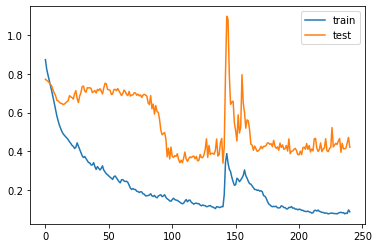

In [65]:
plt.plot(hstry3.history['mse'],label='train')
plt.plot(hstry3.history['val_mse'],label='test')
plt.legend()
plt.show()

In [1211]:
# y2= np.zeros(np.shape(YY2))
# y2 = (YY2-np.min(YY2))/(np.max(YY2)-np.min(YY2))
# np.min(y2)

Mean Squared Error (MSE): 0.4219993016013
Mean Absolute Error (MAE): 0.07364616598430536
R2_score: 0.3401140566848881
Adjusted_R2_score: 1.0337400246255541


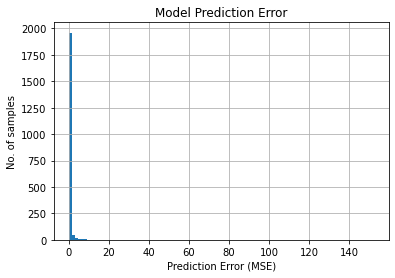

1176 out of 2037
MSE_error< 0.05 = 57.7319587628866 %


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# y_pred = model3.predict(x_te)
# err = np.mean((y_te - y_pred)**2)
# print('model_error=',err)
    
mse = mean_squared_error(y_te, y_pred)
mae = mean_absolute_error(y_te, y_pred)
r2 = r2_score(y_te, y_pred)
adj_r2 = (1 - (1 - r2) * ((y_te.shape[0] - 1) / 
          (y_te.shape[0] - y_te.shape[1] - 1)))
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2_score:", r2)
print("Adjusted_R2_score:", adj_r2)

prediction_error = np.mean(np.square(y_te - y_pred), axis=1)
# Plot histogram of prediction error
num_bins = 100
plt.hist(prediction_error,num_bins,histtype='stepfilled')
plt.xlabel('Prediction Error (MSE)')
plt.ylabel('No. of samples')
plt.title('Model Prediction Error')
plt.grid(True)
plt.show()
pred=np.size(np.where(prediction_error<0.05))
sample=y_te.shape[0]                     
print(pred, 'out of',y_te.shape[0])
print('MSE_error< 0.05 =',pred*100/sample,'%')

In [182]:
# with tf.device('/device:GPU:0'):
#     model3.save("model_for_pattern.h5")
# print("Saved model to disk")

Saved model to disk


In [652]:
# X3=np.loadtxt('testing data/X_128f_batch12K_1.txt')
# X3 = X3[:,0:8]
# Y3=np.loadtxt('testing data/Y_128f_batch12K_1.txt')
# Y3 = Y3[:,0:8]
# XX=np.concatenate((X3,Y3),axis=1)
# np.shape(XX)

(2048, 16)

In [653]:
# S11=np.loadtxt('testing data/ant128_S11_batch12K_1.txt',delimiter=',')
# patt = np.loadtxt('testing data/ant128_patt_batch12K_1.txt',delimiter=',')
# imp = np.loadtxt('testing data/ant128_imp_batch12K_1.txt',delimiter=',')
# zo = imp[:,0:128]
# np.shape(zo)

(2048, 128)

In [654]:
# s3= S11/10
# s3=10**s3
# p3= patt/10
# p3=10**p3
# print(np.max(p3),np.max(s3))

30.618419555652498 2.6023762326196933


In [655]:
# yy3=np.concatenate((p3,s3,zo),axis=1)
# np.shape(y3)

(2048, 41856)

In [656]:
#  xx1= np.zeros(np.shape(XX))
# xx1 = (XX-np.min(XX))/(np.max(XX)-np.min(XX))
# np.min(xx1)

0.0

In [657]:
# model3.load_weights("model_combined2.h5")
# y2_pre = model3.predict(xx1)
# err = np.mean((yy3 - y2_pre)**2)
# print('error=',err)

error= 0.1707986551011584


In [58]:
y1_te=y_te[:,0:41600]
y1_pred=y_pred[:,0:41600]
np.shape(y1_te)

(1416, 41600)

In [59]:
y2_te=y_te[:,41600:41728]
y2_pred=y_pred[:,41600:41728]
np.shape(y2_pred)

(1416, 128)

In [60]:
y2_te= 10*np.log(y2_te)
y2_pred= 10*np.log(y2_pred)

/tmp/ipykernel_15117/2871525376.py:2: RuntimeWarning: divide by zero encountered in log
  y2_pred= 10*np.log(y2_pred)


In [61]:
y3_te=y_te[:,41728:41856]
y3_pred=y_pred[:,41728:41856]
np.shape(y3_pred)

(1416, 128)

In [62]:
y1_te=np.reshape(y1_te,(1416,13,25,128))
y1_pre =np.reshape(y1_pred,(1416,13,25,128))
np.shape(y1_pre)

(1416, 13, 25, 128)

In [63]:
y1_te=np.swapaxes(y1_te,1,3)
y1_pre=np.swapaxes(y1_pre,1,3)
np.shape(y1_te)

(1416, 128, 25, 13)

761


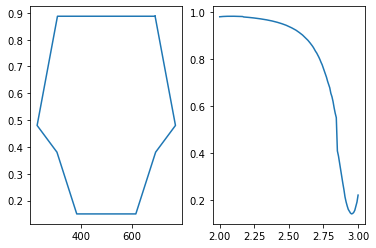

In [272]:
rr= np.random.randint(1416)
print(rr)
act=x_te[rr]
x= np.append(act[0:8],act[0])
x=x*1000
y = np.append(act[8:16],act[8])
# y=y*1000
freq = np.linspace(2,3,128)
# print(x,y)
fig, (ax1, ax2) = plt.subplots(1, 2)
# plt.subplot(2,1,1)
ax1.plot(x,y)
# ax1.xlim(-30,30)
# ax1.ylim(-30,30)
ax2.plot(freq,(s11[rr]))
plt.show()

In [64]:
y1_te= 10*np.log(y1_te)
y1_pre= 10*np.log(y1_pre)

/tmp/ipykernel_15117/2379065114.py:2: RuntimeWarning: divide by zero encountered in log
  y1_pre= 10*np.log(y1_pre)


434


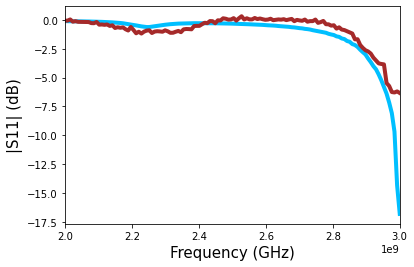

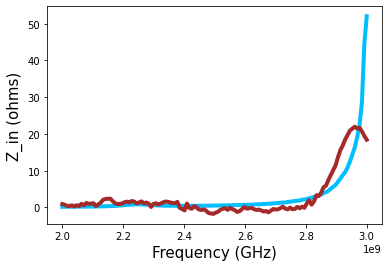

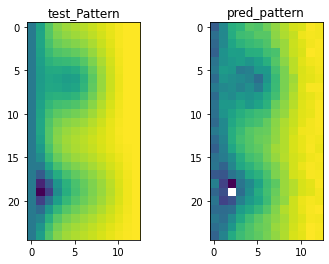

In [85]:
rr = np.random.randint(0,1416)
# rr=1893
print(rr)
# err1 = np.mean((y_te[rr] - y_pred[rr])**2)
# # print('MSE_error=',err1)
# err2 = np.mean(np.absolute(y_te[rr] - y_pred[rr]))
# print('MAE_error=',err2)
# rr=1164
freq = np.linspace(2e9,3e9,128)
#S11 plot
# plt.figure(figsize = (11, 8))
plt.plot(freq,(y2_te[rr]),label='EM simulated',linewidth=4,color = 'deepskyblue')
plt.plot(freq,(y2_pred[rr]),label='Model predicted',linewidth=4,color = 'brown')
# plt.title('S11 predictions', fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frequency (GHz)',fontsize=15)
plt.ylabel('|S11| (dB)',fontsize=15)
# plt.legend(fontsize=25)
# plt.ylim(-60,1)
plt.xlim(2e9,3e9)
plt.show()

#Imp 1D plot
# plt.figure(figsize = (11, 8))
plt.plot(freq,y3_te[rr],label='EM simulated',linewidth=4,color = 'deepskyblue')
plt.plot(freq,y3_pred[rr],label='Model predicted',linewidth=4,color = 'brown')
# plt.title('Zo predictions',fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frequency (GHz)',fontsize=15)
plt.ylabel('Z_in (ohms)',fontsize=15)
# plt.legend(fontsize=23)
# plt.ylim(0,1)
plt.show()

ff=52
# print(ff)
pattern1=y1_te[rr,ff,:,:]
pattern2=y1_pre[rr,ff,:,:]
# pattern heatmap
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(pattern1)
ax1.set_title('test_Pattern')
ax2.imshow(pattern2)
ax2.set_title('pred_pattern')
fig.show()

In [50]:
# np.shape(pattern1[0,:])

aa = pattern1[6]
xx = pattern2[6]
yz = np.flip(xx)
zz = np.append(xx,yz)
bb = np.flip(aa)
cc = np.append(aa,bb)
print(pattern1.shape,pattern2.shape)

(25, 13) (25, 13)


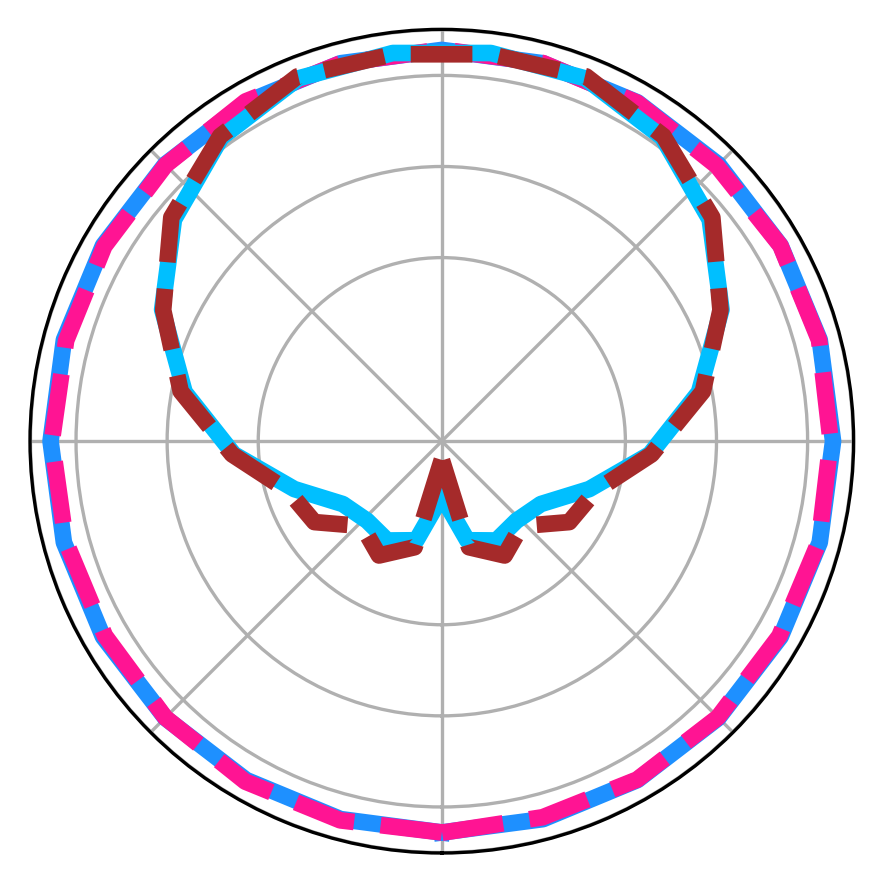

In [51]:
phi1 = np.linspace(0, 2*np.pi, 25)
phi2 = np.linspace(0, 2*np.pi,26)
plt.figure(figsize = (11, 8),dpi=300)
# ax = fig.add_subplot(111, projection='polar')
# # ax.plot(theta, P1, color='r', linewidth=3)
# 
# ax.set_theta_zero_location('N')
sp1 = plt.subplot(2, 1, 1, projection='polar')
sp1.set_theta_zero_location('S')
sp1.set_theta_direction(-1)
sp1.set_xticklabels([])
plt.polar(phi1, pattern1[:,12],label='EM simulated',linewidth=4,color = 'dodgerblue' )
plt.polar(phi1, pattern2[:,12],label='Model predicted',linewidth=4,color = 'deeppink',ls='--')
plt.polar(phi2, cc,linewidth=4,label='EM simulated',color = 'deepskyblue')
plt.polar(phi2,  zz,label='Model predicted',linewidth=4,color = 'brown',ls='--')
ax = plt.gca()
ax.set_rticks([-20, -10, 0, 5])
ax.set_yticklabels([])
ax.set_rlabel_position(150)
plt.show()


# pat2=np.transpose(pat_mat)

# # plt.figure(figsize = (11, 8))
# sp2 = plt.subplot(2, 1, 2, projection='polar')
# sp2.set_theta_zero_location('N')
# sp2.set_theta_direction(-1)
# plt.polar(phi, cc,linewidth=4,label='EM simulated',color = 'dodgerblue')
# plt.polar(phi,  zz,label='Model predicted',linewidth=4,color = 'darkviolet')
# ax = plt.gca()
# # ax.set_rticks([-10, -5, 0, 5])
# ax.set_rlabel_position(150)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# # plt.legend(fontsize=23)
# # plt.title('Pattern(E-plane)',fontsize=15)
# plt.show()

3


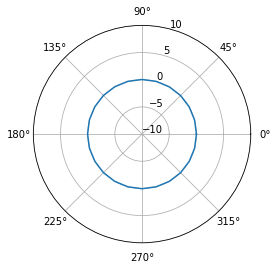

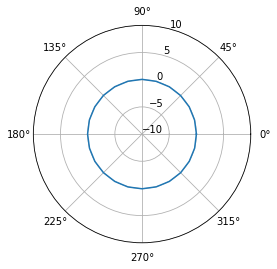

In [125]:
rr = np.random.randint(0,13)
print(rr)
phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pattern1[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pattern2[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()


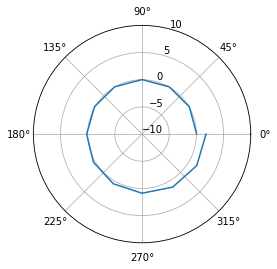

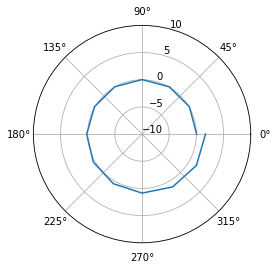

In [126]:
pat1=np.transpose(pattern1)
pat2=np.transpose(pattern2)
phi = np.linspace(0, 2*np.pi,13)
plt.polar(phi, pat1[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()


phi = np.linspace(0, 2*np.pi,13)
plt.polar(phi, pat2[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

# pattern plot in 1D

6


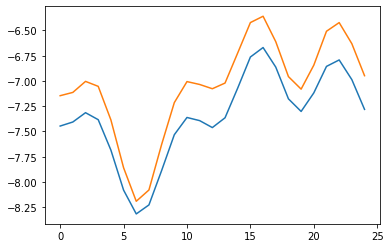

In [173]:
rr = np.random.randint(0,13)
print(rr)
plt.plot(pattern1[:,rr])
plt.plot(pattern2[:,rr])
# plt.title('Zo_test and Zo_pred')
# plt.ylim(1,0)
plt.show()

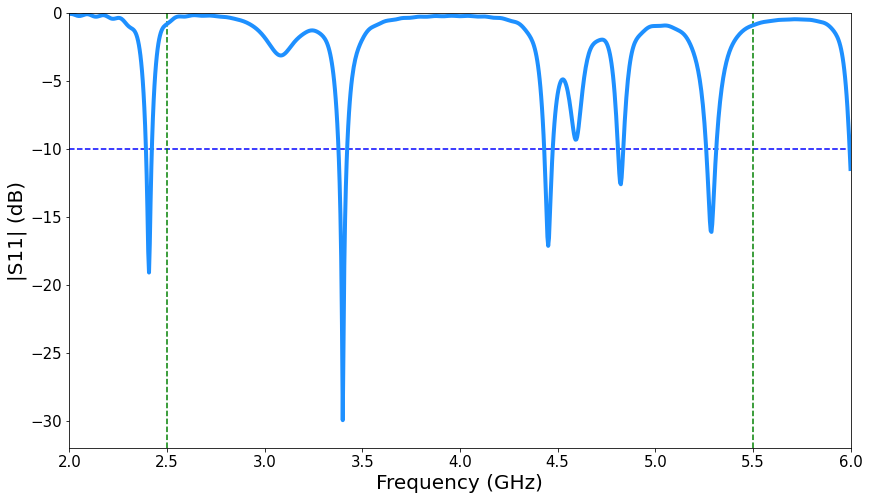

In [36]:
freq = np.linspace(2,6,1001)
plt.figure(figsize = (14, 8))
# markers_on = [-20, -30, -40]
plt.axhline(y=-10, color='b', linestyle='--')
plt.axvline(x=2.5,color='g', linestyle='--')
# plt.axvline(x=3.4,color='g', linestyle='--')
# plt.axvline(x=4.4,color='g', linestyle='--')
plt.axvline(x=5.5,color='g', linestyle='--')
plt.plot(freq,(S11[:,1]),linewidth=4,color = 'dodgerblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('|S11| (dB)',fontsize=20)
# plt.legend(fontsize=25)
plt.ylim(-32,0)
plt.xlim(2,6)
plt.show()

In [6]:
g1 = np.loadtxt('g1.txt')
g2 = np.loadtxt('g2.txt')
np.shape(g1)

(4, 2)

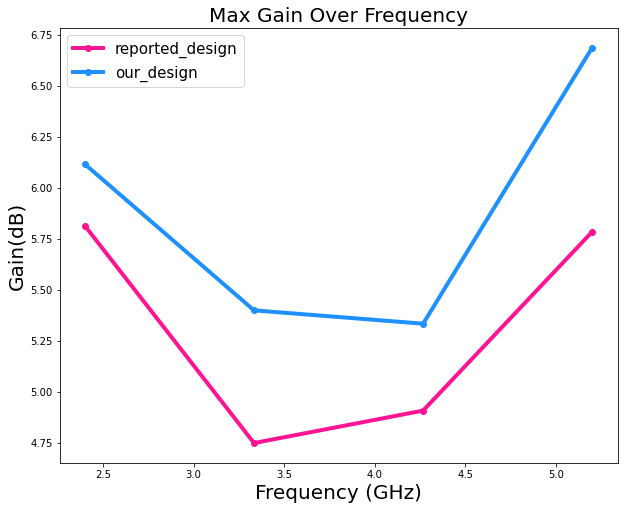

In [26]:
fre = np.linspace(2.4,5.2,4)
plt.figure(figsize = (10, 8))
plt.plot(fre,g1[:,1],linewidth=4,color = 'deeppink',label = 'reported_design',marker = 'o')
plt.plot(fre,g2[:,1],linewidth=4,color = 'dodgerblue',label = 'our_design',marker = 'o')
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Gain(dB)',fontsize=20)
plt.legend(fontsize=15)
plt.title('Max Gain Over Frequency',fontsize=20)
plt.show()

[0.568      0.715      0.93016667 0.63566667 0.36433333 0.06983333
 0.285      0.432      0.64333333 0.52916667 0.366      0.05566667
 0.05566667 0.366      0.52916667 0.64333333] [ 0.00408  0.0129   0.02581  0.00814 -0.00814 -0.02581 -0.0129  -0.00408
  0.00408] [ 0.0086   0.00175 -0.00804 -0.02666 -0.02666 -0.00804  0.00175  0.0086
  0.0086 ]


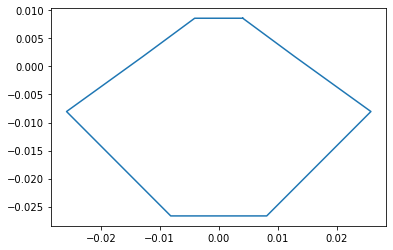

In [96]:
act=x_te[325]
act=((act*0.06)-0.03)
x= np.append(act[0:8],act[0])
y = np.append(act[8:16],act[8])
print(x_te[325],x,y)
plt.plot(x,y)

In [98]:
np.savetxt('X_broad.txt',x,fmt='%5.5f', delimiter = '\t')
np.savetxt('Y_broad.txt',y,fmt='%5.5f', delimiter = '\t')

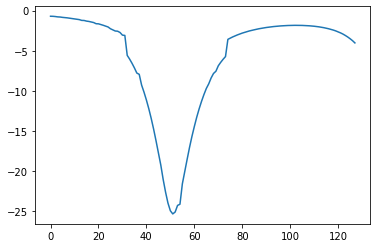

In [79]:
plt.plot(10*np.log(y2_te[325]))